# 1: インポート

# 2: データ読込み

# 3: 特徴量数値化

# 4: ハイパーパラメータの調整

# 5: 実装

# 6: 過学習の有無を確認

# 1: インポート

In [1]:
import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import numpy as np

import keras
from keras import regularizers
from keras.metrics import mae
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# 2: データの読み込み

In [2]:
data_set = pd.read_csv(rf'data.csv',sep=",", header=0)

x = DataFrame(data_set.drop(data_set[["Product", "Component", "target"]], axis=1))
y = DataFrame(data_set["target"])


tr_x ,va_x ,tr_y ,va_y = train_test_split(x,y,test_size=0.2, shuffle=False)

# 5: 実装

In [13]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(5,)))
model.add(Dropout(0.05))

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))

model.summary()
print("\n")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               768       
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)              

In [14]:
model.compile(loss='mean_absolute_error', optimizer='adamax', metrics=['mae'])

#ディープニューラルネットワークの学習
history = model.fit(tr_x, tr_y, batch_size=64, epochs=500, verbose=1, validation_data=(va_x, va_y))

va_pred = model.predict(va_x)
mae = mean_absolute_error(va_y, va_pred)
print("MAE: " ,mae)

Train on 15176 samples, validate on 3795 samples
Epoch 1/500
15176/15176 [==============================] - 2s 123us/step - loss: 2.7077 - mae: 0.3382 - val_loss: 1.8948 - val_mae: 0.0288
Epoch 2/500
15176/15176 [==============================] - 1s 79us/step - loss: 1.6278 - mae: 0.0186 - val_loss: 1.3870 - val_mae: 0.0046
Epoch 3/500
15176/15176 [==============================] - 1s 75us/step - loss: 1.2109 - mae: 0.0065 - val_loss: 1.0448 - val_mae: 0.0043
Epoch 4/500
15176/15176 [==============================] - 1s 78us/step - loss: 0.9115 - mae: 0.0059 - val_loss: 0.7841 - val_mae: 0.0043
Epoch 5/500
15176/15176 [==============================] - 1s 74us/step - loss: 0.6803 - mae: 0.0056 - val_loss: 0.5805 - val_mae: 0.0044
Epoch 6/500
15176/15176 [==============================] - 1s 79us/step - loss: 0.4990 - mae: 0.0055 - val_loss: 0.4207 - val_mae: 0.0043
Epoch 7/500
15176/15176 [==============================] - 1s 77us/step - loss: 0.3578 - mae: 0.0054 - val_loss: 0.2972 - 

15176/15176 [==============================] - 2s 113us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 118/500
15176/15176 [==============================] - 2s 108us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 119/500
15176/15176 [==============================] - 2s 108us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 120/500
15176/15176 [==============================] - 2s 107us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 121/500
15176/15176 [==============================] - 2s 116us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 122/500
15176/15176 [==============================] - 2s 104us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0045 - val_mae: 0.0045
Epoch 123/500
15176/15176 [==============================] - 2s 110us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 124/500
15176/15176 [

15176/15176 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.005 - 2s 108us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 234/500
15176/15176 [==============================] - 2s 103us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 235/500
15176/15176 [==============================] - 2s 106us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 236/500
15176/15176 [==============================] - 2s 106us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 237/500
15176/15176 [==============================] - 2s 102us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 238/500
15176/15176 [==============================] - 2s 104us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 239/500
15176/15176 [==============================] - 2s 105us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_m

15176/15176 [==============================] - 2s 110us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 350/500
15176/15176 [==============================] - 2s 108us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 351/500
15176/15176 [==============================] - 2s 105us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 352/500
15176/15176 [==============================] - 2s 118us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 353/500
15176/15176 [==============================] - 2s 124us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 354/500
15176/15176 [==============================] - 2s 119us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 355/500
15176/15176 [==============================] - 2s 113us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 356/500
15176/15176 [

15176/15176 [==============================] - 1s 71us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 466/500
15176/15176 [==============================] - 1s 69us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 467/500
15176/15176 [==============================] - 1s 69us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 468/500
15176/15176 [==============================] - 1s 69us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 469/500
15176/15176 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.005 - 1s 75us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 470/500
15176/15176 [==============================] - 1s 69us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 471/500
15176/15176 [==============================] - 1s 71us/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0044 - val_mae: 0.0

# 目的変数の基本統計量

In [9]:
y.describe()

,target
count,1.897100e+04
mean,5.518121e-03
std,7.305498e-03
min,3.528769e-07
25%,3.556666e-04
50%,1.570861e-03
75%,9.876750e-03
max,2.791983e-02


# 6: 過学習の有無の確認

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


485 485


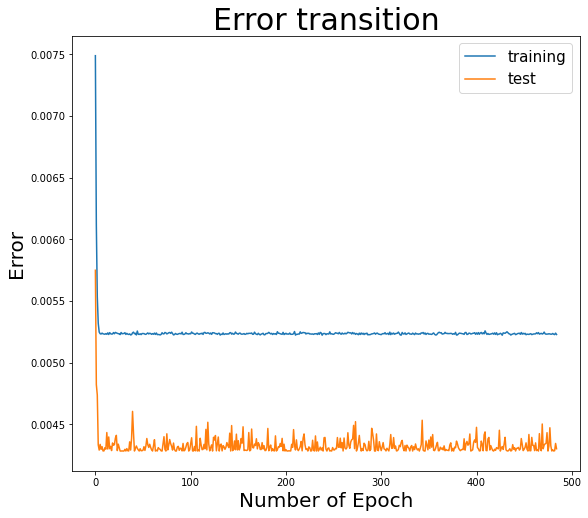

In [15]:
import matplotlib.pyplot as plt

metrics = ['loss']  # 使用する評価関数を指定

plt.figure(figsize=(20, 8))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分け、i+1番目のスペースを使う
    plt.title(metric)  # グラフのタイトルを表示
    
    plt_train = history.history[metric][15:len(tr_x)]  # historyから訓練データの評価を取り出す
    
    plt_test = history.history['val_' + metric][15:len(va_x)]
    # plt_test = history.history[metric][2:len(x_test)]  # historyからテストデータの評価を取り出す
    print(len(plt_train), len(plt_test))
    
    plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
    plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
    
    
    plt.title("Error transition", fontsize=30)
    plt.xlabel('Number of Epoch', size = 20)
    plt.ylabel('Error', size = 20)
    plt.tick_params(labelsize=10)
    plt.legend(prop={"size": 15})  # ラベルの表示
    plt.savefig("C:/Users/g1723012/Desktop/abstract_template/500ex.eps")
    
    
plt.show()  